In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json

from os import listdir
from os.path import isfile, join

In [3]:
image = cv2.imread("1005_20UPGM23211816_AfterBonding.jpg")
image.shape

(5504, 6880, 3)

In [58]:
## Trouver la colonne verte à gauche

def find_column_left(image):
    colonnes=[image[:,i,:] for i in range(image.shape[1])]
    i=0
    bool=False
    while not bool and i<len(colonnes)-1:
        col=colonnes[i]
        if (np.mean(col[:,0])+4<np.mean(col[:,1])) and (np.mean(col[:,2])+4<np.mean(col[:,1])):
            bool=True
        if not bool:
            i+=1
    return i, colonnes[i]

In [ ]:
# Même chose à droite

def find_column_right(image):
    colonnes=[image[:,i,:] for i in range(image.shape[1])]
    i=image.shape[1]-1
    bool=False
    while not bool and i>0:
        col=colonnes[i]
        if (np.mean(col[:,0])+4<np.mean(col[:,1])) and (np.mean(col[:,2])+4<np.mean(col[:,1])):
            bool=True
        if not bool:
            i-=1
    return i, colonnes[i]

In [78]:
# # Compte le nombre de fils du module

def count(image, column_left, column_right) :
    state = False
    levels = np.arange(0.7, 0.9, 0.01)
    counters = np.zeros(levels.shape[0])
    for j in range(levels.shape[0]) :
        for i in range(image.shape[0]) :
            if (image[i,column_left].sum()/(255*3)) > levels[j] :
                if not(state) :
                    counters[j]+=1
                    state = True
            else :
                state = False
    state = False
    unique, counts = np.unique(counters, return_counts=True)
    arg = np.argmax(counts)
    print(unique[arg])
    for j in range(levels.shape[0]) :
        for i in range(image.shape[0]) :
            if (image[i,column_right].sum()/(255*3)) > levels[j] :
                if not(state) :
                    counters[j]+=1
                    state = True
            else :
                state = False
    unique, counts = np.unique(counters, return_counts=True)
    arg = np.argmax(counts)
    return (unique[arg])

# # counters = count(image, column_left=777, column_right=6080)
# # plt.plot(np.arange(0.6, 1.0, 0.01), counters)

# print(count(image, column_left=777, column_right=6080))

In [7]:
image = cv2.imread("ModulePictures/P1018_20UPGM23211497_AfterWirebonding.jpg")
print(count(image, column_left=860, column_right=6070))

353.0
703.0


In [8]:
with open("iref_trim_per_module.json", "r") as f:
    data = json.load(f)

In [9]:
def iref_trim (serialNumber, data) :
    error = True
    for x in data :
        if x['serialNumber'] == serialNumber :
            iref = x
            error = False
    if error :
        return ("serialNumber not found")
    return (iref['IREF_TRIM_1'], iref['IREF_TRIM_2'], iref['IREF_TRIM_3'], iref['IREF_TRIM_4'])

In [10]:
iref_trim('20UPGM23210148', data)

(13, 11, 8, 6)

In [11]:
def extract_serial_number (file_name) :
    names = file_name.split("_")
    for x in names :
        if "20UPGM" in x :
            return (x)
    return (None)

In [12]:
extract_serial_number("1005_20UPGM23211816_AfterBonding")

'20UPGM23211816'

In [13]:
def expected_wire_number (serialNumber, data) :
    iref = iref_trim(serialNumber, data)
    nb_wire_per_trim = [4, 3, 3, 2, 3, 2, 2, 1, 3, 2, 2, 1, 2, 1, 1, 0]
    return (693 + nb_wire_per_trim[iref[0]] + nb_wire_per_trim[iref[1]] + nb_wire_per_trim[iref[2]] + nb_wire_per_trim[iref[3]])

In [14]:
serial = extract_serial_number("1005_20UPGM23211816_AfterBonding")
iref_trim(serial, data)

(8, 8, 9, 7)

In [15]:
expected_wire_number(serial, data)

702

In [16]:
serial = extract_serial_number("20UPGM23211355_PPPV2_46_AfterBonding")
iref_trim(serial, data)

(11, 9, 6, 10)

In [81]:
def test_wire_number (file_name, data, column_left = None, column_right = None) :
    expected_nb = expected_wire_number(extract_serial_number(file_name), data)
    print(expected_nb)
    image = cv2.imread("ModulePictures/" + file_name)
    if column_left == None :
        column_left = find_column_left(image)[0] - 200
    if column_right == None :
        column_right = find_column_right(image)[0] + 200
    real_nb = count(image, column_left, column_right)
    print(real_nb)
    return (expected_nb == real_nb)

In [82]:
test_wire_number('P1018_20UPGM23211497_AfterWirebonding.jpg', data)

700
351.0
703.0


np.False_

In [19]:
# Test
fichiers = [f for f in listdir("ModulePictures") if isfile(join("ModulePictures", f))]
fichiersOK = []

for x in fichiers :
    if not("NOK" in x) and not("NoLight" in x) and not("AfterRebounding" in x) :
        fichiersOK.append(x)
        # test = test_wire_number(x, data)
        # print(test)
        # if not(test) :
        #     print(x)

In [20]:
fichiersOK

['20UPGM23211355_PPPV2_46_AfterBonding.jpg',
 'P1008_20UPGM23210595_AfterWirebonding.jpg',
 'P1014_20UPGM23211689_AfterWirebonding.jpg',
 'P1015_20UPGM23210321_AfterWirebonding.jpg',
 'P1017_20UPGM23211308_AfterWirebonding.jpg',
 'P1018_20UPGM23211497_AfterWirebonding.jpg',
 'P1023_20UPGM23211432_AfterWirebonding.jpg',
 'P1024_20UPGM23211820_AfterWirebonding.jpg',
 'P1027_20UPGM23211441_AfterBonding.jpg',
 'P1033_20UPGM23211444_AfterBonding.jpg']

In [21]:
# print(test_wire_number('20UPGM23211355_PPPV2_46_AfterBonding.jpg', data, 800, 6080))
# OK

# print(test_wire_number('P1008_20UPGM23210595_AfterWirebonding.jpg', data, 820, 6030))
# OK

# print(test_wire_number('P1014_20UPGM23211689_AfterWirebonding.jpg', data, 870, 6080))
# OK

# print(test_wire_number('P1015_20UPGM23210321_AfterWirebonding.jpg', data, 840, 6050))
# OK

# print(test_wire_number('P1017_20UPGM23211308_AfterWirebonding.jpg', data, 880, 6080))
# OK

# print(test_wire_number('P1018_20UPGM23211497_AfterWirebonding.jpg', data, 860, 6070))
# Pb : 703 au lieu de 700

# print(test_wire_number('P1023_20UPGM23211432_AfterWirebonding.jpg', data, 940, 6160))
# Pb : 705 au lieu de 698

# print(test_wire_number('P1024_20UPGM23211820_AfterWirebonding.jpg', data, 930, 6160))
# Pb : 704 au lieu de 700

# print(test_wire_number('P1027_20UPGM23211441_AfterBonding.jpg', data, 800, 6030))
# Pb : 701 au lieu de 697

# print(test_wire_number('P1033_20UPGM23211444_AfterBonding.jpg', data, 860, 6110))
# Pb : 704 au lieu de 700

In [22]:
print(iref_trim('20UPGM23211497', data))

(12, 12, 7, 10)


In [23]:
print(count(image, column_left=860, column_right=6070))
# Attendu : 352 / 700

353.0
703.0


In [24]:
def crop_lignes (image) :
    grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    bw = cv2.threshold(grey, 127,255,cv2.THRESH_BINARY_INV)[1]
    n = bw.shape[0]
    limit_high = 0
    x = bw[limit_high].mean()
    while (limit_high < n//2) and (x <= 150) :
        limit_high+=1
        x = bw[limit_high].mean()
    limit_low = n-1
    x = bw[limit_low].mean()
    while (limit_low > n//2) and (x <= 150) :
        limit_low-=1
        x = bw[limit_low].mean()
    return (limit_high, limit_low)

In [25]:
def crop_colonnes (image) :
    grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    bw = cv2.threshold(grey, 127,255,cv2.THRESH_BINARY_INV)[1]
    n = bw.shape[1]
    limit_left = 0
    x = bw[:,limit_left].mean()
    while (limit_left < n//2) and (x <= 150) :
        limit_left+=1
        x = bw[:,limit_left].mean()
    limit_right = n-1
    x = bw[:,limit_right].mean()
    while (limit_right > n//2) and (x <= 150) :
        limit_right-=1
        x = bw[:,limit_right].mean()
    return (limit_left, limit_right)

In [55]:
def crop_test_wire_number (file_name, data) :
    expected_nb = expected_wire_number(extract_serial_number(file_name), data)
    print(expected_nb)
    image = cv2.imread("ModulePictures/" + file_name)
    high, low = crop_lignes(image)
    left, right = crop_colonnes(image)
    image_crop = image[high:low, left:right]
    grey_crop = cv2.cvtColor(image_crop, cv2.COLOR_BGR2GRAY)
    bw_crop = cv2.threshold(grey_crop, 127,255,cv2.THRESH_BINARY_INV)[1]
    if (image_crop.shape[1] < 5700) :
        real_nb = count(bw_crop, column_left = 25 , column_right = bw_crop.shape[1]-25)
    else :
        real_nb = count(bw_crop, column_left = 500 , column_right = bw_crop.shape[1]-500)
    print(real_nb)
    return (expected_nb == real_nb)

In [56]:
test = crop_test_wire_number('P1018_20UPGM23211497_AfterWirebonding.jpg', data)

700
0.0
0.0


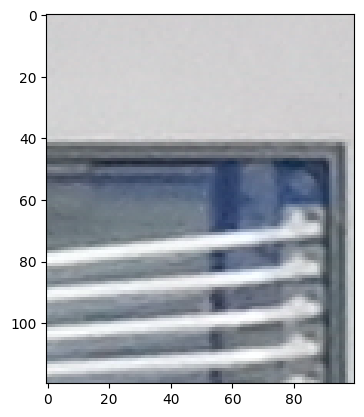

In [53]:
plt.imshow(test[:120, test.shape[1]-100:])

In [54]:
count(test[:120, test.shape[1]-100:], 25, 75)

5.0


np.float64(10.0)

In [57]:
# test

# print(crop_test_wire_number('20UPGM23211355_PPPV2_46_AfterBonding.jpg', data))
# 6221 colonnes
# OK avec +/- 500

# print(crop_test_wire_number('P1008_20UPGM23210595_AfterWirebonding.jpg', data))
# 5393 colonnes
# OK avec +/- 25

# print(crop_test_wire_number('P1014_20UPGM23211689_AfterWirebonding.jpg', data))
# 5389 colonnes
# OK avec +/- 25

# print(crop_test_wire_number('P1015_20UPGM23210321_AfterWirebonding.jpg', data))
# 5390 colonnes
# OK avec +/- 25

# print(crop_test_wire_number('P1017_20UPGM23211308_AfterWirebonding.jpg', data))
# 5378 colonnes
# OK avec +/- 25

print(crop_test_wire_number('P1018_20UPGM23211497_AfterWirebonding.jpg', data))
# Pb : 702 au lieu de 700

print(crop_test_wire_number('P1023_20UPGM23211432_AfterWirebonding.jpg', data))
# Pb : 699 au lieu de 698

print(crop_test_wire_number('P1024_20UPGM23211820_AfterWirebonding.jpg', data))
# Pb :

print(crop_test_wire_number('P1027_20UPGM23211441_AfterBonding.jpg', data))
# Pb :

print(crop_test_wire_number('P1033_20UPGM23211444_AfterBonding.jpg', data))
# 5054 colonnes
# OK avec +/- 100

700
0.0
0.0
False
698
0.0
0.0
False
700
0.0
0.0
False
697
0.0
0.0
False
700
0.0
0.0
False


In [28]:
print(iref_trim('20UPGM23211355', data)) # 351 / 700
print(iref_trim('20UPGM23210595', data)) # 352 / 700
print(iref_trim('20UPGM23211689', data)) # 351 / 699
print(iref_trim('20UPGM23210321', data)) # 352 / 701
print(iref_trim('20UPGM23211308', data)) # 352 / 701

print(iref_trim('20UPGM23211497', data)) # 352 / 700
print(iref_trim('20UPGM23211432', data)) # 351 / 698
print(iref_trim('20UPGM23211820', data)) # 351 / 700
print(iref_trim('20UPGM23211441', data)) # 349 / 697
print(iref_trim('20UPGM23211444', data)) # 351 / 700

(11, 9, 6, 10)
(12, 12, 10, 7)
(7, 9, 9, 13)
(10, 10, 10, 12)
(9, 10, 7, 8)
(12, 12, 7, 10)
(6, 14, 11, 7)
(7, 5, 5, 10)
(7, 15, 10, 11)
(5, 13, 5, 10)


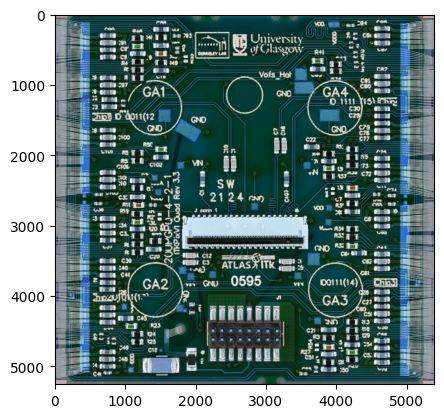

In [29]:
image = cv2.imread('ModulePictures/P1008_20UPGM23210595_AfterWirebonding.jpg')
high, low = crop_lignes(image)
left, right = crop_colonnes(image)
image_crop = image[high:low, left:right]
plt.imshow(image_crop)

In [30]:
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bw = cv2.threshold(grey, 127,255,cv2.THRESH_BINARY_INV)[1]

lignes = np.zeros(bw.shape[0])
colonnes = np.zeros(bw.shape[1])

for i in range (bw.shape[0]) :
    lignes[i] = bw[i].mean()

for j in range (bw.shape[1]) :
    colonnes[j] = bw[:,j].mean()

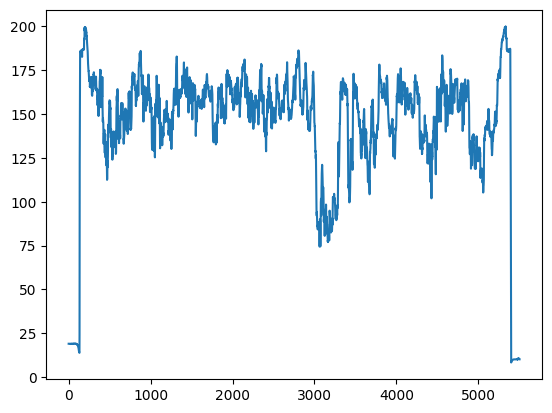

In [31]:
plt.plot(np.arange(bw.shape[0]), lignes)

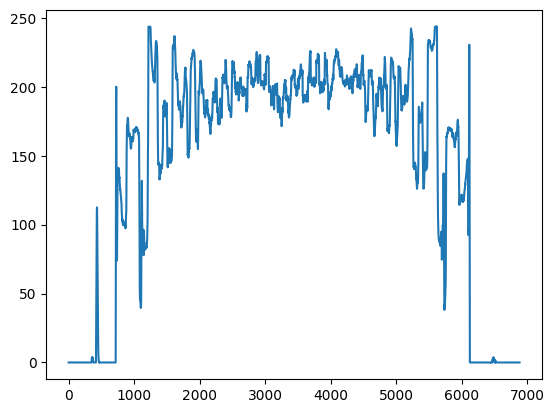

In [32]:
plt.plot(np.arange(bw.shape[1]), colonnes)

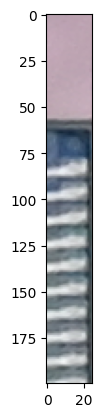

In [33]:
plt.imshow(image_crop[:200, image_crop.shape[1]-25:])

In [88]:
def find_wires (image, level = 0.9) :
    left_wires = []
    right_wires = []
    column_left = find_column_left(image)[0]
    column_right = find_column_right(image)[0]
    state = False
    for i in range(image.shape[0]) :
        if (image[i,column_left].sum()/(255*3)) > level :
            if not(state) :
                left_wires.append((i, column_left))
                state = True
        else :
            state = False
    state = False
    for i in range(image.shape[0]) :
        if (image[i,column_right].sum()/(255*3)) > level :
            if not(state) :
                right_wires.append((i, column_right))
                state = True
        else :
            state = False
    return (left_wires, right_wires)

In [89]:
image = cv2.imread('ModulePictures/20UPGM23210250_PPPV2_45_AfterBonding_NOK.jpg')
find_wires(image)

([(407, 796),
  (437, 796),
  (480, 796),
  (501, 796),
  (511, 796),
  (521, 796),
  (542, 796),
  (555, 796),
  (576, 796),
  (589, 796),
  (601, 796),
  (614, 796),
  (625, 796),
  (637, 796),
  (652, 796),
  (664, 796),
  (675, 796),
  (690, 796),
  (707, 796),
  (717, 796),
  (843, 796),
  (878, 796),
  (895, 796),
  (912, 796),
  (928, 796),
  (962, 796),
  (975, 796),
  (1000, 796),
  (1009, 796),
  (1022, 796),
  (1033, 796),
  (1045, 796),
  (1056, 796),
  (1075, 796),
  (1089, 796),
  (1228, 796),
  (1238, 796),
  (1302, 796),
  (1368, 796),
  (1399, 796),
  (1411, 796),
  (1438, 796),
  (1470, 796),
  (1484, 796),
  (1502, 796),
  (1517, 796),
  (1527, 796),
  (1548, 796),
  (1566, 796),
  (1602, 796),
  (1620, 796),
  (1643, 796),
  (1655, 796),
  (1668, 796),
  (1681, 796),
  (1693, 796),
  (1709, 796),
  (1720, 796),
  (1732, 796),
  (1745, 796),
  (1755, 796),
  (1774, 796),
  (1787, 796),
  (1799, 796),
  (1809, 796),
  (1821, 796),
  (1831, 796),
  (1842, 796),
  (1852